In [1]:
# Import libraries
import numpy as np
import pandas as pd
import os
import sys
sys.path.append(os.path.abspath('/Users/idrees/Code/govxs/'))
from model.VotingModel import VotingModel
from model.EvalMetrics import EvalMetrics

# Add the directory containing the VotingModel to the Python path

from model.VotingRules import VotingRules

# Initialize simulation parameters
num_voters = 144
num_projects = 600
total_op_tokens = 30e6
num_rounds = 100
voter_type = 'random_uniform_model'
quorum=17
# Initialize the model
model = VotingModel(voter_type=voter_type, num_voters=num_voters, num_projects=num_projects, total_op_tokens=total_op_tokens)

# Add custom voting rules if any OR just simply add new voting rule in VotingRules.py class
# Example:
# model.add_voting_rule("custom_rule", custom_rule_function)

# Initialize the evaluation metrics
model.step()
eval_metrics = EvalMetrics(model)

/Users/idrees/Code/govxs/agents/VoterAgent.py:7: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


In [2]:
model.compile_fund_allocations()

,majoritarian_moving_phantoms,r1_quadratic,r2_mean,r3_median,r4_capped_median,Project
0,54117.141819,52179.353264,52306.800821,52693.252544,52693.252544,Project 1
1,50013.885293,51081.485772,51351.251105,54650.226574,54650.226574,Project 2
2,51454.150591,49432.845157,50564.689138,45329.869600,45329.869600,Project 3
3,47896.880120,49783.148901,50858.859867,43980.274045,43980.274045,Project 4
4,52091.716474,49852.236136,49227.629728,47362.901822,47362.901822,Project 5
...,...,...,...,...,...,...
595,47294.168135,47536.237923,45946.185640,44003.851963,44003.851963,Project 596
596,47998.795856,47258.866066,45588.918529,41800.755227,41800.755227,Project 597
597,44906.929291,48872.327328,47149.247659,46898.668001,46898.668001,Project 598
598,47415.486250,48777.081598,48139.544427,46371.410108,46371.410108,Project 599


# Evaluate Egalitarian Score

In [5]:
egalitarian_results=eval_metrics.evaluate_egalitarian_score(num_rounds)
egalitarian_results

Redistributed Scores: [[23935.04008685 30000.          1792.84376769 ...  6215.97120157
  30000.         23833.84495489]
 [27057.10414089 30000.         12492.60049959 ... 30000.
  30000.         20748.52806034]
 [ 6284.16838471  3210.00603618 30000.         ... 30000.
  30000.         30000.        ]
 ...
 [14533.25179182 15563.82639764 30000.         ...    58.79076318
  30000.         30000.        ]
 [ 4170.86822286 30000.         30000.         ... 30000.
  30000.         30000.        ]
 [30000.         30000.         30000.         ... 16920.56544174
  30000.          4113.58814779]]
Median Scores: [28743.029934   30000.         30000.         30000.
 30000.         30000.         30000.         30000.
 30000.         30000.         30000.         30000.
 30000.         30000.         30000.         30000.
 30000.         30000.         30000.         30000.
 30000.         29400.9225298  30000.         30000.
 30000.         30000.         30000.         30000.
 30000.         

KeyboardInterrupt: 

In [ ]:
egalitarian_results.describe()

,round,majoritarian_moving_phantoms_egalitarian_score,r1_quadratic_egalitarian_score,r2_mean_egalitarian_score,r3_median_egalitarian_score,r4_capped_median_egalitarian_score
count,10.00000,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01
mean,5.50000,2.327932e+07,2.333549e+07,2.332672e+07,2.335975e+07,2.335975e+07
std,3.02765,1.305403e+05,1.310050e+05,1.405168e+05,1.078429e+05,1.078429e+05
min,1.00000,2.299739e+07,2.307834e+07,2.304388e+07,2.318633e+07,2.318633e+07
25%,3.25000,2.322700e+07,2.328642e+07,2.325729e+07,2.328626e+07,2.328626e+07
50%,5.50000,2.328537e+07,2.332503e+07,2.336343e+07,2.333769e+07,2.333769e+07
75%,7.75000,2.332816e+07,2.340966e+07,2.338841e+07,2.344514e+07,2.344514e+07
max,10.00000,2.345651e+07,2.353072e+07,2.350069e+07,2.350867e+07,2.350867e+07


# Evaluate Gini Index

In [5]:
gini_results,allocations = eval_metrics.evaluate_gini_index(num_rounds)
print("Gini Index Results:")
gini_results.head(100)

Gini Index Results:


,round,majoritarian_moving_phantoms_gini_index,r1_quadratic_gini_index,r2_mean_gini_index,r3_median_gini_index,r4_capped_median_gini_index
0,1,0.054041,0.022992,0.045967,0.065315,0.065315
1,2,0.056931,0.023417,0.046851,0.066854,0.066854
2,3,0.057117,0.023892,0.048133,0.066839,0.066839
3,4,0.058237,0.023680,0.046916,0.065801,0.065801
4,5,0.054551,0.022532,0.044797,0.066389,0.066389
5,6,0.052848,0.021162,0.042661,0.060877,0.060877
6,7,0.058002,0.022146,0.043480,0.066247,0.066247
7,8,0.056202,0.022127,0.043975,0.066952,0.066952
8,9,0.058228,0.022907,0.044864,0.064257,0.064257
9,10,0.052495,0.022718,0.044151,0.063079,0.063079


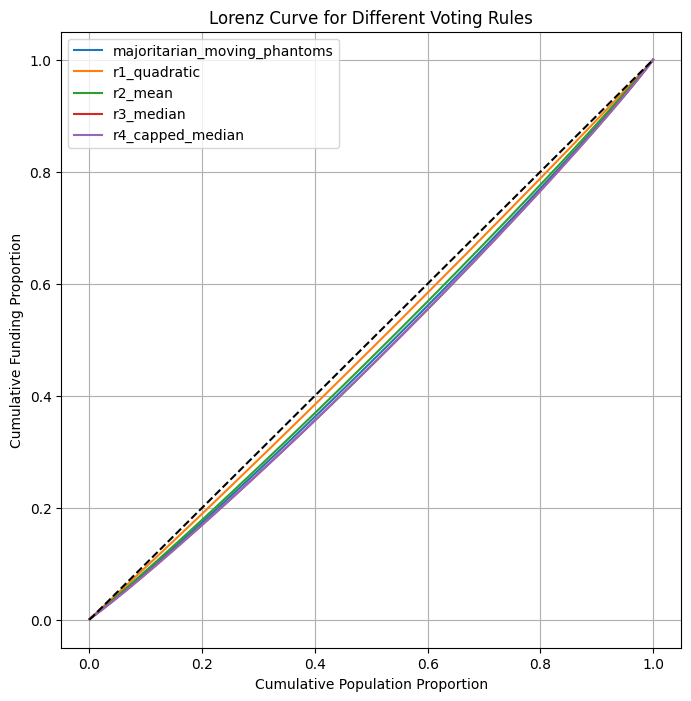

In [6]:
import matplotlib.pyplot as plt
def plot_lorenz_curve(averaged_cumulative_allocations):
        plt.figure(figsize=(8, 8))
        
        for voting_rule, lorenz_values in averaged_cumulative_allocations.items():
            # Lorenz curve starts at (0,0)
            plt.plot(np.linspace(0, 1, len(lorenz_values)), lorenz_values, label=voting_rule)
        
        # Line of equality
        plt.plot([0, 1], [0, 1], color='black', linestyle='--')
        
        plt.xlabel('Cumulative Population Proportion')
        plt.ylabel('Cumulative Funding Proportion')
        plt.title('Lorenz Curve for Different Voting Rules')
        plt.legend()
        plt.grid(True)
        plt.show()
plot_lorenz_curve(allocations)

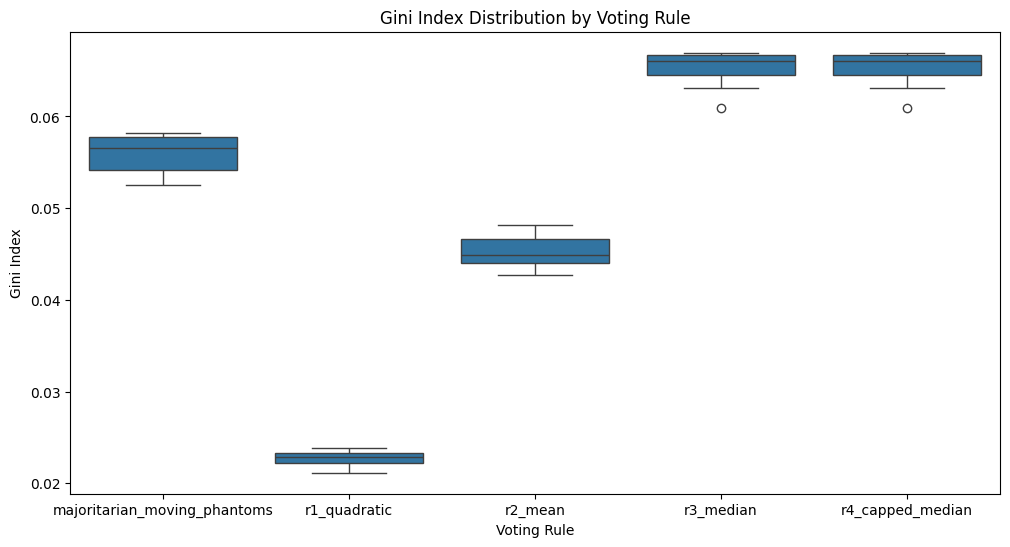

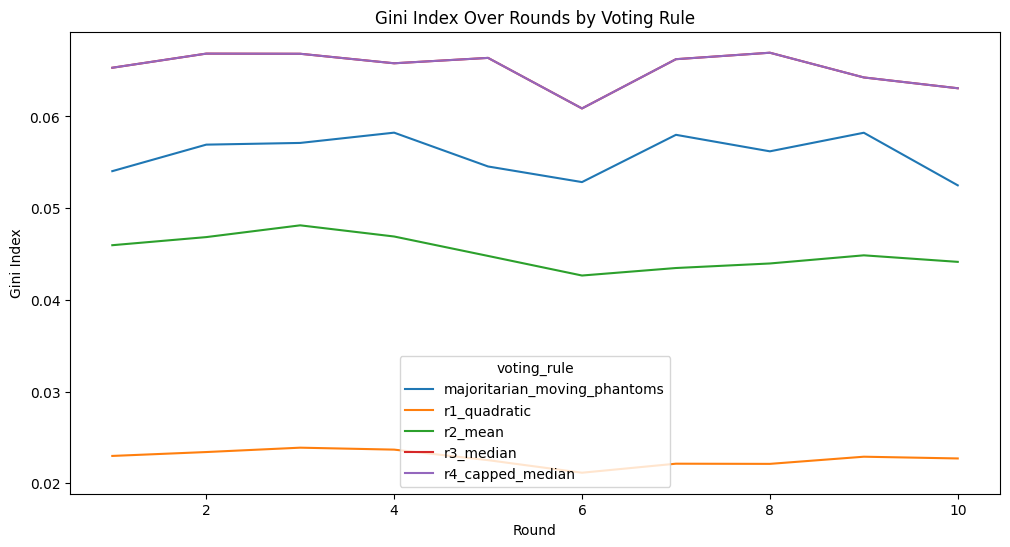

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for box plot
gini_results_long = gini_results.melt(id_vars=['round'], var_name='voting_rule', value_name='gini_index')
gini_results_long['voting_rule'] = gini_results_long['voting_rule'].str.replace('_gini_index', '')

# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='voting_rule', y='gini_index', data=gini_results_long)
plt.title('Gini Index Distribution by Voting Rule')
plt.xlabel('Voting Rule')
plt.ylabel('Gini Index')
plt.show()

# Line Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='round', y='gini_index', hue='voting_rule', data=gini_results_long)
plt.title('Gini Index Over Rounds by Voting Rule')
plt.xlabel('Round')
plt.ylabel('Gini Index')
plt.show()


# Evaluate Alignment with Ground Truth

In [8]:
alignment_results = eval_metrics.evaluate_alignment(num_rounds)
print("Alignment Results:")
alignment_results.head(100)

Alignment Results:


,round,majoritarian_moving_phantoms_l1_distance,r1_quadratic_l1_distance,r2_mean_l1_distance,r3_median_l1_distance,r4_capped_median_l1_distance
0,1,2.511112e+06,1.063558e+06,2.004705e+06,2.995798e+06,2.995798e+06
1,2,2.429385e+06,1.021205e+06,1.936679e+06,2.729109e+06,2.729109e+06
2,3,2.404435e+06,1.017458e+06,1.937082e+06,2.735437e+06,2.735437e+06
3,4,2.514343e+06,1.059965e+06,2.028325e+06,2.957550e+06,2.957550e+06
4,5,2.372510e+06,1.034192e+06,2.022405e+06,2.825621e+06,2.825621e+06
5,6,2.474953e+06,1.095653e+06,2.057372e+06,2.985933e+06,2.985933e+06
6,7,2.536955e+06,1.060487e+06,2.019485e+06,2.931652e+06,2.931652e+06
7,8,2.382597e+06,1.039570e+06,1.975710e+06,2.865794e+06,2.865794e+06
8,9,2.574696e+06,1.040614e+06,1.957932e+06,2.828616e+06,2.828616e+06
9,10,2.374299e+06,1.027318e+06,1.936755e+06,2.799167e+06,2.799167e+06


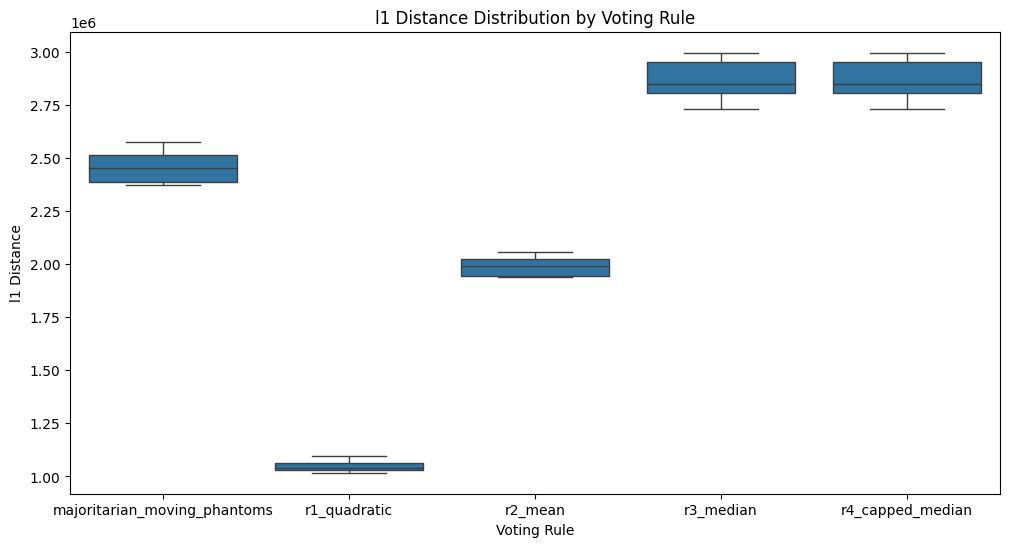

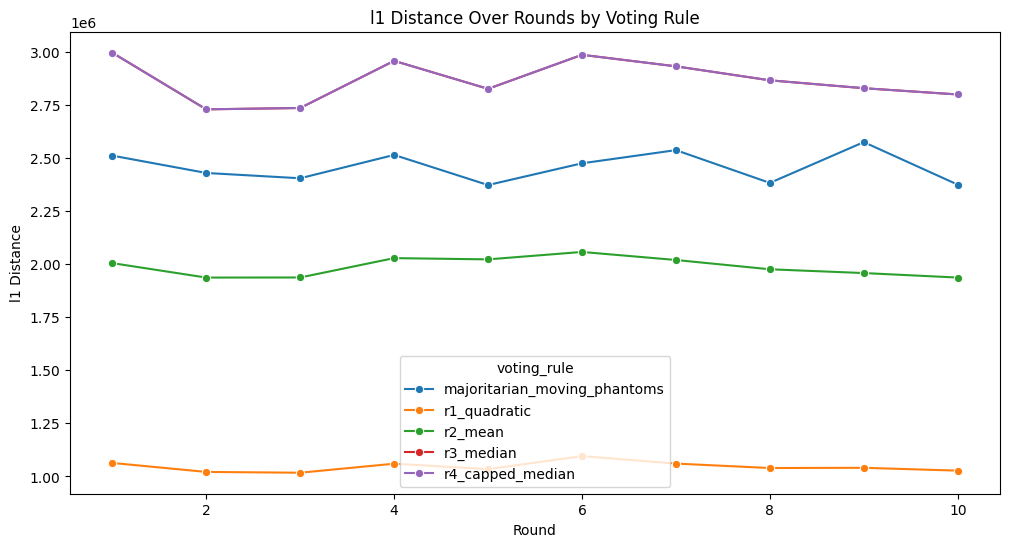

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for plotting
alignment_results_long = alignment_results.melt(id_vars=['round'], var_name='voting_rule', value_name='l1_distance')
alignment_results_long['voting_rule'] = alignment_results_long['voting_rule'].str.replace('_l1_distance', '')

# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='voting_rule', y='l1_distance', data=alignment_results_long)
plt.title('l1 Distance Distribution by Voting Rule')
plt.xlabel('Voting Rule')
plt.ylabel('l1 Distance')
plt.show()

# Line Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='round', y='l1_distance', hue='voting_rule', data=alignment_results_long, marker='o')
plt.title('l1 Distance Over Rounds by Voting Rule')
plt.xlabel('Round')
plt.ylabel('l1 Distance')
plt.show()


In [10]:
def calculate_alignment_metrics(alignment_results):
    metrics = {
        "voting_rule": [],
        "mean_l1_distance": [],
        "std_l1_distance": [],
        "min_l1_distance": [],
        "max_l1_distance": []
    }
    
    for voting_rule in model.voting_rules.keys():
        l1_distances = alignment_results[f"{voting_rule}_l1_distance"]
        metrics["voting_rule"].append(voting_rule)
        metrics["mean_l1_distance"].append(np.mean(l1_distances))
        metrics["std_l1_distance"].append(np.std(l1_distances))
        metrics["min_l1_distance"].append(np.min(l1_distances))
        metrics["max_l1_distance"].append(np.max(l1_distances))
    
    return pd.DataFrame(metrics)

# Calculate metrics
alignment_metrics = calculate_alignment_metrics(alignment_results)

alignment_metrics


,voting_rule,mean_l1_distance,std_l1_distance,min_l1_distance,max_l1_distance
0,majoritarian_moving_phantoms,2.457529e+06,70583.746431,2.372510e+06,2.574696e+06
1,r1_quadratic,1.046002e+06,22730.713438,1.017458e+06,1.095653e+06
2,r2_mean,1.987645e+06,42188.903938,1.936679e+06,2.057372e+06
3,r3_median,2.865468e+06,93381.421791,2.729109e+06,2.995798e+06
4,r4_capped_median,2.865468e+06,93381.421791,2.729109e+06,2.995798e+06


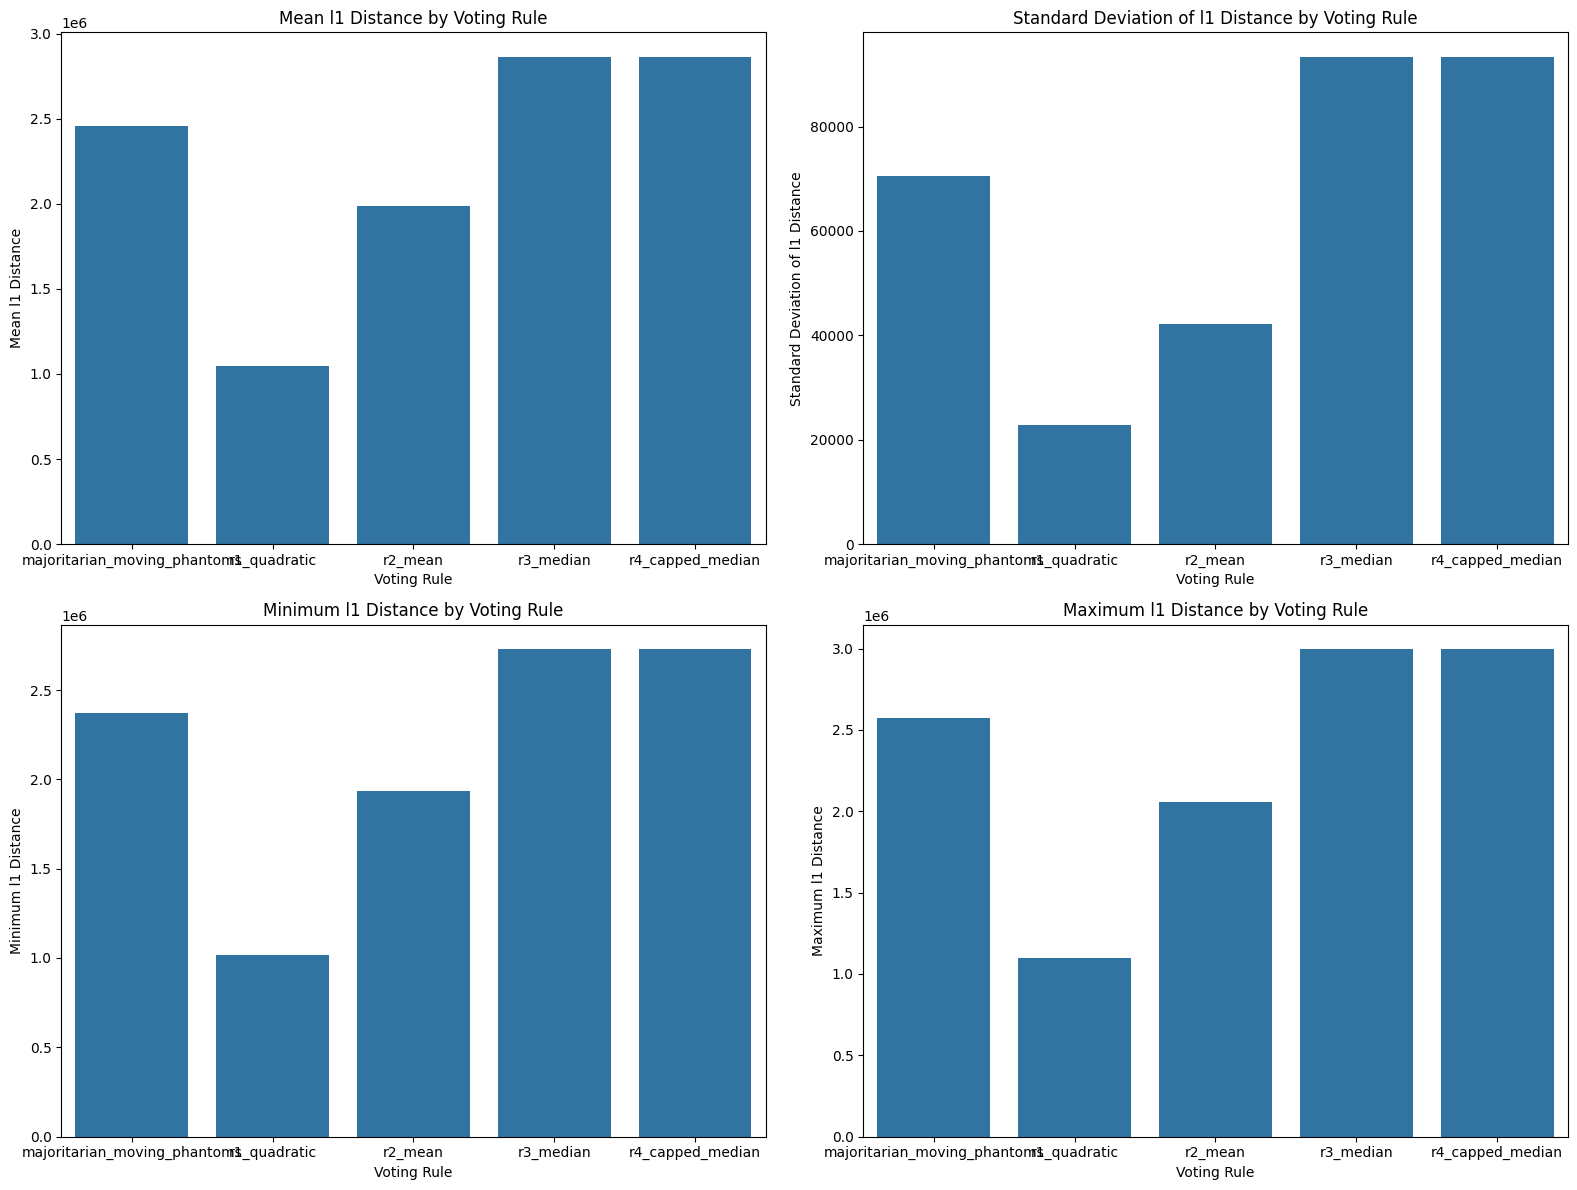

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting metrics
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Mean l1 Distance
sns.barplot(x='voting_rule', y='mean_l1_distance', data=alignment_metrics, ax=axes[0, 0])
axes[0, 0].set_title('Mean l1 Distance by Voting Rule')
axes[0, 0].set_xlabel('Voting Rule')
axes[0, 0].set_ylabel('Mean l1 Distance')

# Standard Deviation of l1 Distance
sns.barplot(x='voting_rule', y='std_l1_distance', data=alignment_metrics, ax=axes[0, 1])
axes[0, 1].set_title('Standard Deviation of l1 Distance by Voting Rule')
axes[0, 1].set_xlabel('Voting Rule')
axes[0, 1].set_ylabel('Standard Deviation of l1 Distance')

# Minimum l1 Distance
sns.barplot(x='voting_rule', y='min_l1_distance', data=alignment_metrics, ax=axes[1, 0])
axes[1, 0].set_title('Minimum l1 Distance by Voting Rule')
axes[1, 0].set_xlabel('Voting Rule')
axes[1, 0].set_ylabel('Minimum l1 Distance')

# Maximum l1 Distance
sns.barplot(x='voting_rule', y='max_l1_distance', data=alignment_metrics, ax=axes[1, 1])
axes[1, 1].set_title('Maximum l1 Distance by Voting Rule')
axes[1, 1].set_xlabel('Voting Rule')
axes[1, 1].set_ylabel('Maximum l1 Distance')

plt.tight_layout()
plt.show()


# Evaluate Social Welfare

In [12]:


social_welfare_results = eval_metrics.evaluate_social_welfare(num_rounds)
print("Social Welfare Results:")
social_welfare_results.head(100)

Social Welfare Results:


,round,majoritarian_moving_phantoms_social_welfare_avg_l1_distance,r1_quadratic_social_welfare_avg_l1_distance,r2_mean_social_welfare_avg_l1_distance,r3_median_social_welfare_avg_l1_distance,r4_capped_median_social_welfare_avg_l1_distance
0,1,2.190406e+07,2.197283e+07,2.195927e+07,2.197199e+07,2.197199e+07
1,2,2.186011e+07,2.192293e+07,2.191549e+07,2.192544e+07,2.192544e+07
2,3,2.195290e+07,2.201858e+07,2.200662e+07,2.201871e+07,2.201871e+07
3,4,2.193506e+07,2.200880e+07,2.199448e+07,2.200450e+07,2.200450e+07
4,5,2.184413e+07,2.190954e+07,2.189936e+07,2.191132e+07,2.191132e+07
5,6,2.184457e+07,2.191105e+07,2.189861e+07,2.191501e+07,2.191501e+07
6,7,2.184994e+07,2.192269e+07,2.190226e+07,2.191495e+07,2.191495e+07
7,8,2.194745e+07,2.201469e+07,2.200325e+07,2.201710e+07,2.201710e+07
8,9,2.201431e+07,2.208257e+07,2.207473e+07,2.208185e+07,2.208185e+07
9,10,2.193748e+07,2.200101e+07,2.199098e+07,2.201084e+07,2.201084e+07


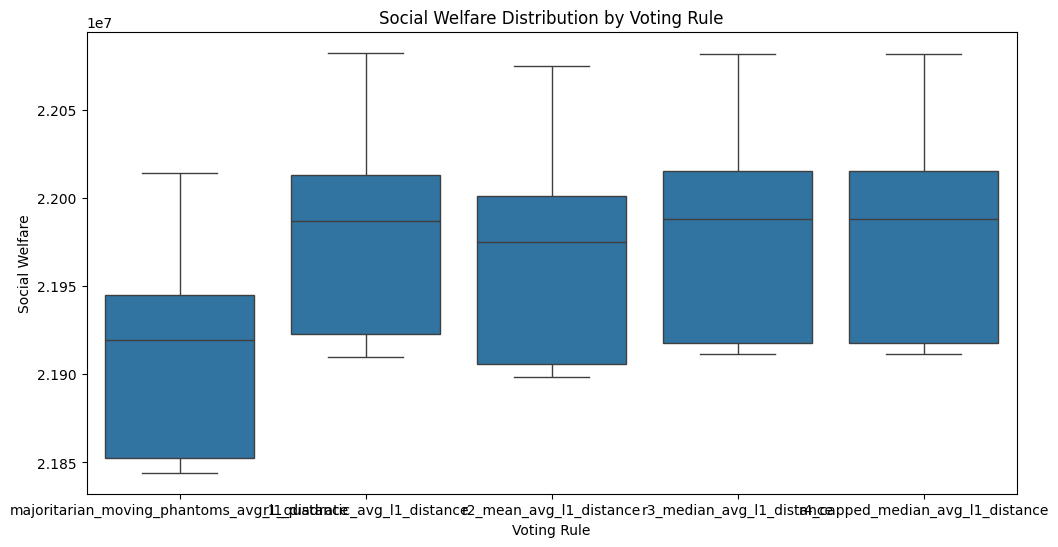

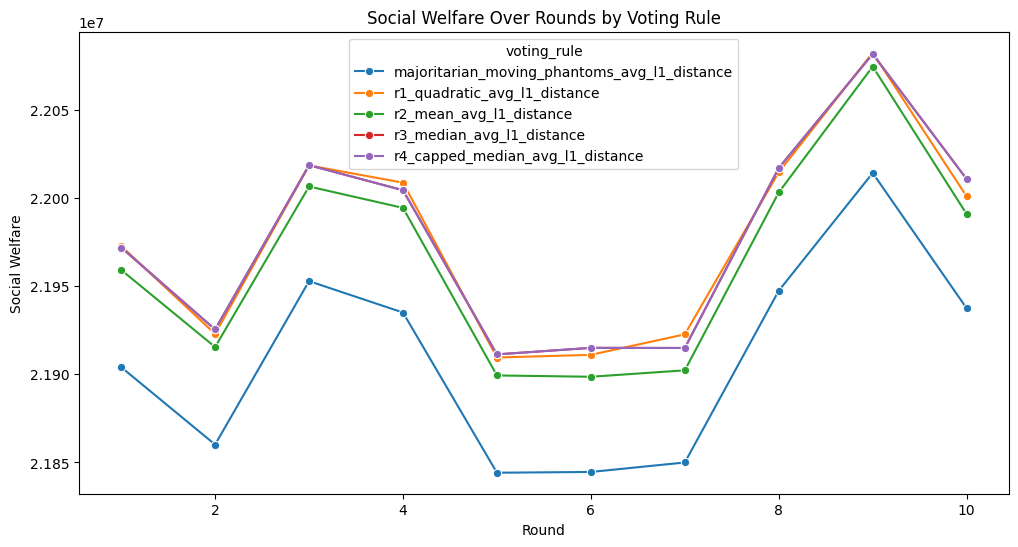

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for plotting
social_welfare_results_long = social_welfare_results.melt(id_vars=['round'], var_name='voting_rule', value_name='social_welfare')
social_welfare_results_long['voting_rule'] = social_welfare_results_long['voting_rule'].str.replace('_social_welfare', '')

# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='voting_rule', y='social_welfare', data=social_welfare_results_long)
plt.title('Social Welfare Distribution by Voting Rule')
plt.xlabel('Voting Rule')
plt.ylabel('Social Welfare')
plt.show()

# Line Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='round', y='social_welfare', hue='voting_rule', data=social_welfare_results_long, marker='o')
plt.title('Social Welfare Over Rounds by Voting Rule')
plt.xlabel('Round')
plt.ylabel('Social Welfare')
plt.show()


# Evaluate Resistance to Control

In [14]:
control_results = eval_metrics.evaluate_control(num_rounds,1)
print("Control Results:")
control_results.head(100)

/Users/idrees/Code/govxs/model/VotingRules.py:54: RuntimeWarning: divide by zero encountered in divide
  real_votes = voting_matrix[:, j] / sum(voting_matrix[0])
/Users/idrees/Code/govxs/model/VotingRules.py:54: RuntimeWarning: invalid value encountered in divide
  real_votes = voting_matrix[:, j] / sum(voting_matrix[0])


KeyboardInterrupt: 

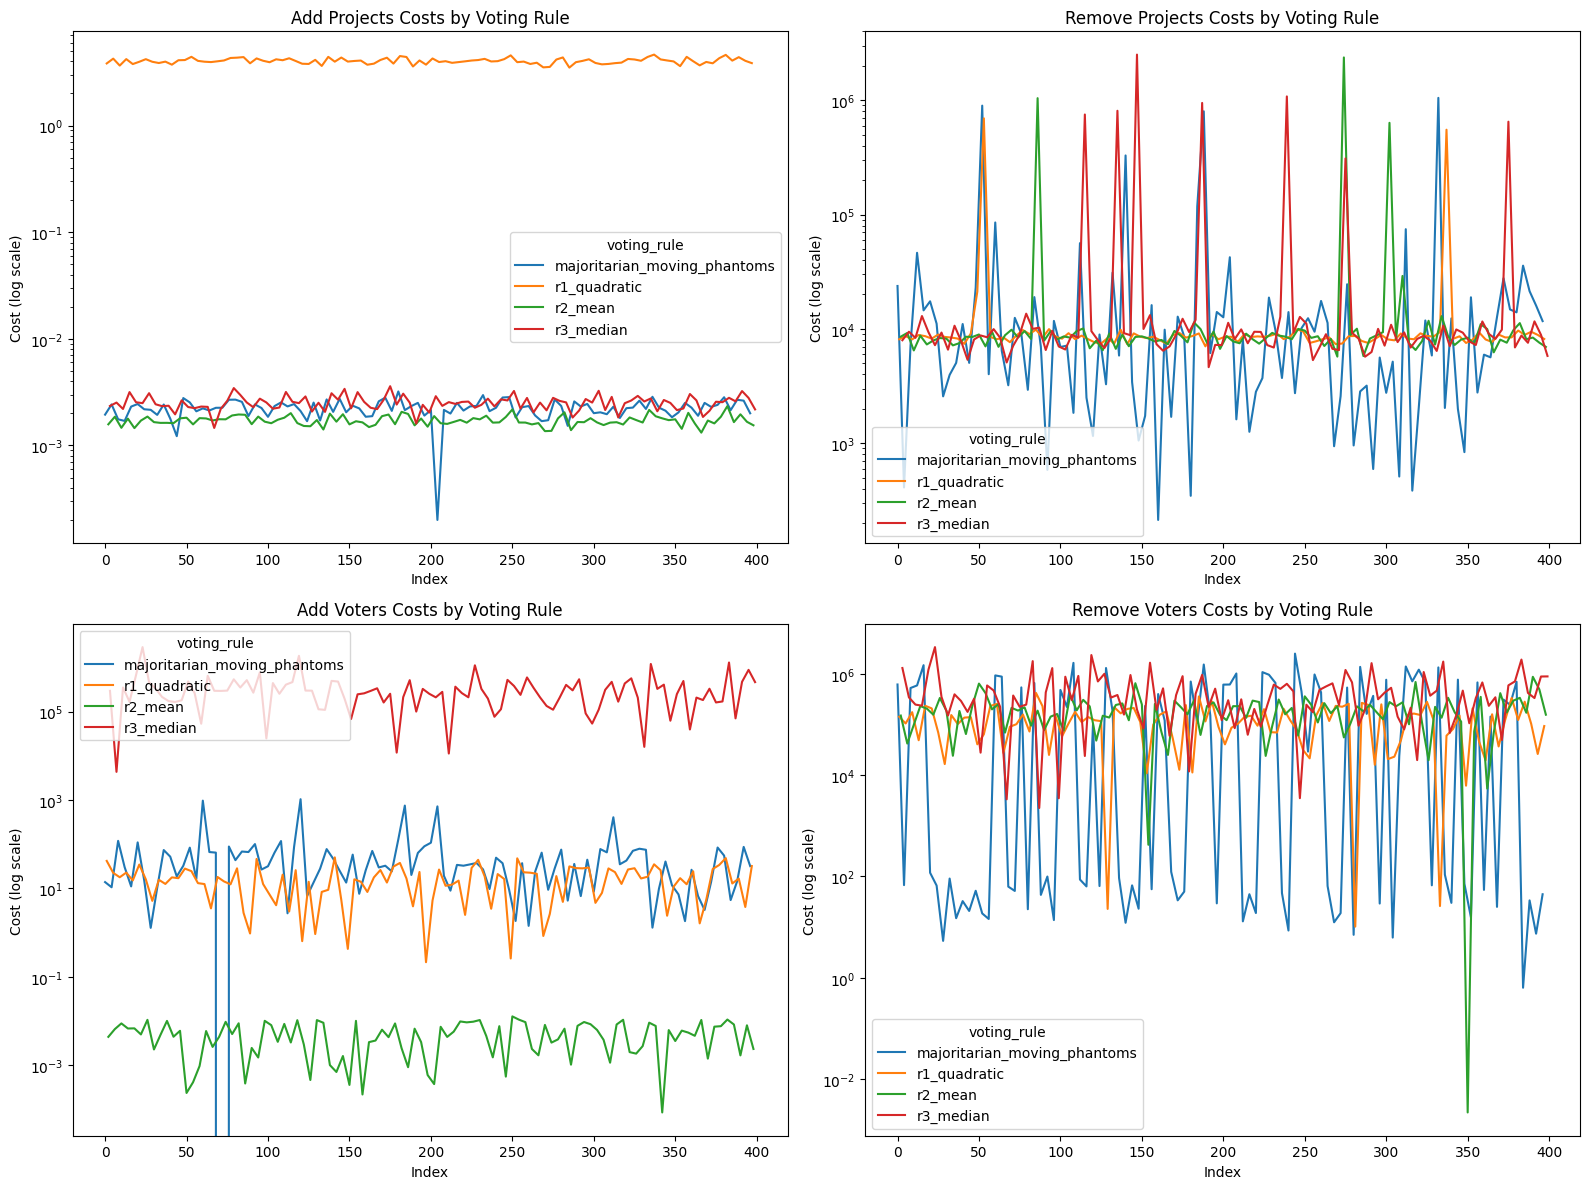

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Plotting for each control strategy
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Line Plot for add_projects
sns.lineplot(x=control_results.index, y='add_projects', hue='voting_rule', data=control_results, ax=axes[0, 0])
axes[0, 0].set_yscale('log')
axes[0, 0].set_title('Add Projects Costs by Voting Rule')
axes[0, 0].set_xlabel('Index')
axes[0, 0].set_ylabel('Cost (log scale)')

# Line Plot for remove_projects
sns.lineplot(x=control_results.index, y='remove_projects', hue='voting_rule', data=control_results, ax=axes[0, 1])
axes[0, 1].set_yscale('log')
axes[0, 1].set_title('Remove Projects Costs by Voting Rule')
axes[0, 1].set_xlabel('Index')
axes[0, 1].set_ylabel('Cost (log scale)')

# Line Plot for add_voters
sns.lineplot(x=control_results.index, y='add_voters', hue='voting_rule', data=control_results, ax=axes[1, 0])
axes[1, 0].set_yscale('log')
axes[1, 0].set_title('Add Voters Costs by Voting Rule')
axes[1, 0].set_xlabel('Index')
axes[1, 0].set_ylabel('Cost (log scale)')

# Line Plot for remove_voters
sns.lineplot(x=control_results.index, y='remove_voters', hue='voting_rule', data=control_results, ax=axes[1, 1])
axes[1, 1].set_yscale('log')
axes[1, 1].set_title('Remove Voters Costs by Voting Rule')
axes[1, 1].set_xlabel('Index')
axes[1, 1].set_ylabel('Cost (log scale)')

plt.tight_layout()
plt.show()

In [ ]:
# Analyze the results
def analyze_results(df):
    analysis = df.groupby('voting_rule').describe().transpose()
    return analysis

analysis_results = analyze_results(control_results)
analysis_results

voting_rule            majoritarian_moving_phantoms   r1_quadratic  \
add_projects    count                  1.000000e+02     100.000000   
                mean                   2.234299e-03       4.030560   
                std                    4.027276e-04       0.244173   
                min                    2.003377e-04       3.491420   
                25%                    2.007212e-03       3.858771   
                50%                    2.259355e-03       4.021119   
                75%                    2.507295e-03       4.189926   
                max                    3.210582e-03       4.623706   
remove_projects count                  1.000000e+02     100.000000   
                mean                   4.256801e+04   20898.813336   
                std                    1.594033e+05   87102.983136   
                min                    2.132468e+02    7034.146648   
                25%                    2.771560e+03    8114.093736   
                50%                    7.162014e+03    8512.102114   
                75%                    1.459642e+04    8918.474807   
                max                    1.048565e+06  694582.047310   
add_voters      count                  1.000000e+02     100.000000   
                mean                   7.663489e+01      17.588437   
                std                    1.718932e+02      12.209635   
                min                    0.000000e+00       0.213011   
                25%                    1.306591e+01       7.717236   
                50%                    3.255123e+01      16.477788   
                75%                    6.871414e+01      25.839817   
                max                    1.043031e+03      50.352673   
remove_voters   count                  1.000000e+02     100.000000   
                mean                   3.404870e+05  129910.171297   
                std                    4.958291e+05   89059.513329   
                min                    6.368872e-01      10.241713   
                25%                    3.378407e+01   59611.695202   
                50%                    1.209005e+02  119240.003321   
                75%                    6.140845e+05  186136.850279   
                max                    2.500183e+06  419900.849182   

voting_rule                 r2_mean     r3_median  
add_projects    count  1.000000e+02  1.000000e+02  
                mean   1.719002e-03  2.523532e-03  
                std    1.853187e-04  3.926801e-04  
                min    1.320194e-03  1.460475e-03  
                25%    1.610285e-03  2.253392e-03  
                50%    1.672068e-03  2.526005e-03  
                75%    1.824257e-03  2.731810e-03  
                max    2.341246e-03  3.596685e-03  
remove_projects count  1.000000e+02  1.000000e+02  
                mean   4.877101e+04  7.849097e+04  
                std    2.632460e+05  3.092402e+05  
                min    5.721329e+03  4.627322e+03  
                25%    7.571853e+03  7.208580e+03  
                50%    8.356592e+03  8.754767e+03  
                75%    9.216633e+03  9.961865e+03  
                max    2.366824e+06  2.506221e+06  
add_voters      count  1.000000e+02  1.000000e+02  
                mean   5.313786e-03  3.582816e+05  
                std    3.452863e-03  3.789541e+05  
                min    8.456118e-05  4.339263e+03  
                25%    2.298789e-03  1.698264e+05  
                50%    4.985456e-03  2.877841e+05  
                75%    8.318283e-03  4.480962e+05  
                max    1.264313e-02  2.893776e+06  
remove_voters   count  1.000000e+02  1.000000e+02  
                mean   2.056331e+05  5.136932e+05  
                std    1.459332e+05  5.476756e+05  
                min    2.200773e-03  2.246159e+03  
                25%    1.089511e+05  1.897819e+05  
                50%    1.870382e+05  3.430079e+05  
                75%    2.557110e+05  6.375082e+05  
                max    8.

Resistance: The quadratic aggregation method shows higher resistance to adding projects but lower resistance to removing projects compared to mean and median aggregation methods. Median aggregation shows the highest resistance to removing projects and adding voters.
Costs: Removing projects and voters generally incurs higher costs than adding them, indicating greater resistance to these control strategies.
Variability: High standard deviations and max values indicate significant variability in the costs, suggesting that the effectiveness of control strategies can vary widely depending on specific scenarios.

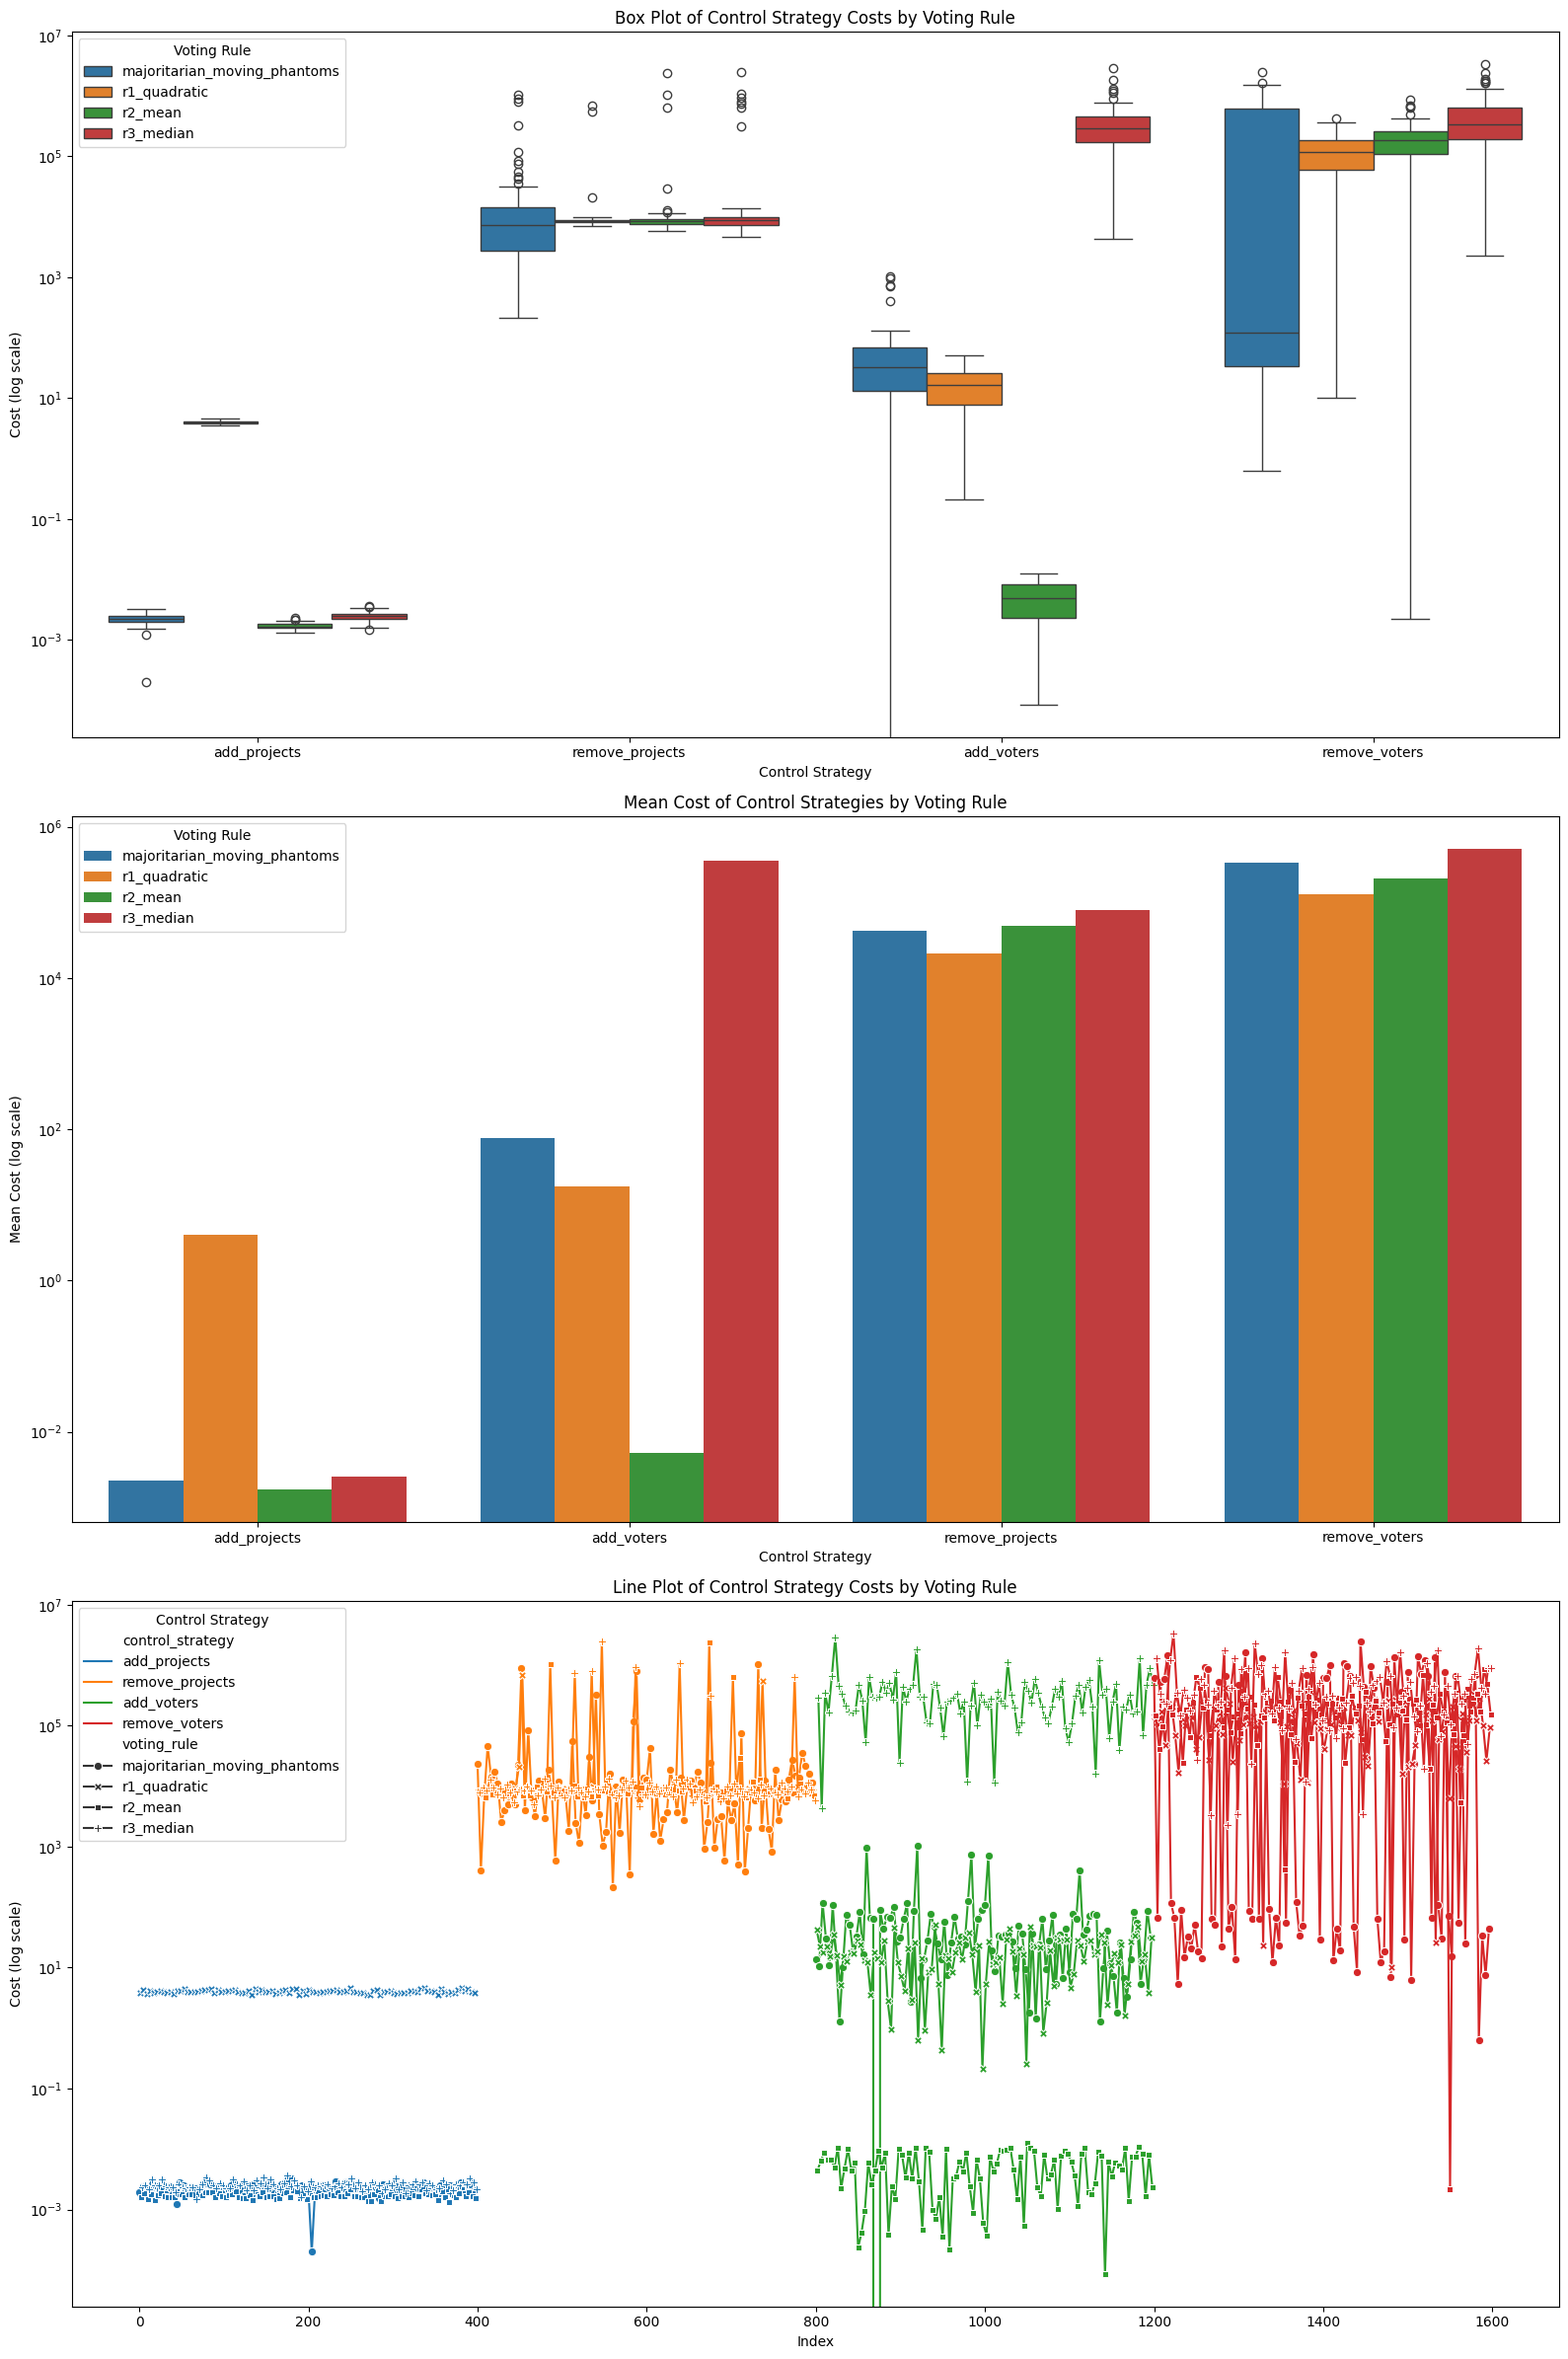

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming `control_results_raw` is the DataFrame with the provided data

# Prepare data for plotting
control_results_long = control_results.melt(id_vars=['voting_rule'], var_name='control_strategy', value_name='cost')

# Create a figure with multiple subplots
fig, axes = plt.subplots(3, 1, figsize=(16, 24))

# Box Plot
sns.boxplot(x='control_strategy', y='cost', hue='voting_rule', data=control_results_long, ax=axes[0])
axes[0].set_yscale('log')
axes[0].set_title('Box Plot of Control Strategy Costs by Voting Rule')
axes[0].set_xlabel('Control Strategy')
axes[0].set_ylabel('Cost (log scale)')
axes[0].legend(title='Voting Rule')

# Bar Plot for Mean Costs
mean_data = control_results_long.groupby(['control_strategy', 'voting_rule']).mean().reset_index()
sns.barplot(x='control_strategy', y='cost', hue='voting_rule', data=mean_data, ax=axes[1])
axes[1].set_yscale('log')
axes[1].set_title('Mean Cost of Control Strategies by Voting Rule')
axes[1].set_xlabel('Control Strategy')
axes[1].set_ylabel('Mean Cost (log scale)')
axes[1].legend(title='Voting Rule')

# Line Plot for Individual Data Points
sns.lineplot(x='index', y='cost', hue='control_strategy', style='voting_rule', markers=True, dashes=False, data=control_results_long.reset_index(), ax=axes[2])
axes[2].set_yscale('log')
axes[2].set_title('Line Plot of Control Strategy Costs by Voting Rule')
axes[2].set_xlabel('Index')
axes[2].set_ylabel('Cost (log scale)')
axes[2].legend(title='Control Strategy')

plt.tight_layout()
plt.show()


/var/folders/jc/585j6n692cs_9w0hfdcpf43w0000gn/T/ipykernel_18547/2060427186.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='control_strategy', y='mean_cost', hue='voting_rule', data=mean_std_data, ax=axes[1], ci=None)


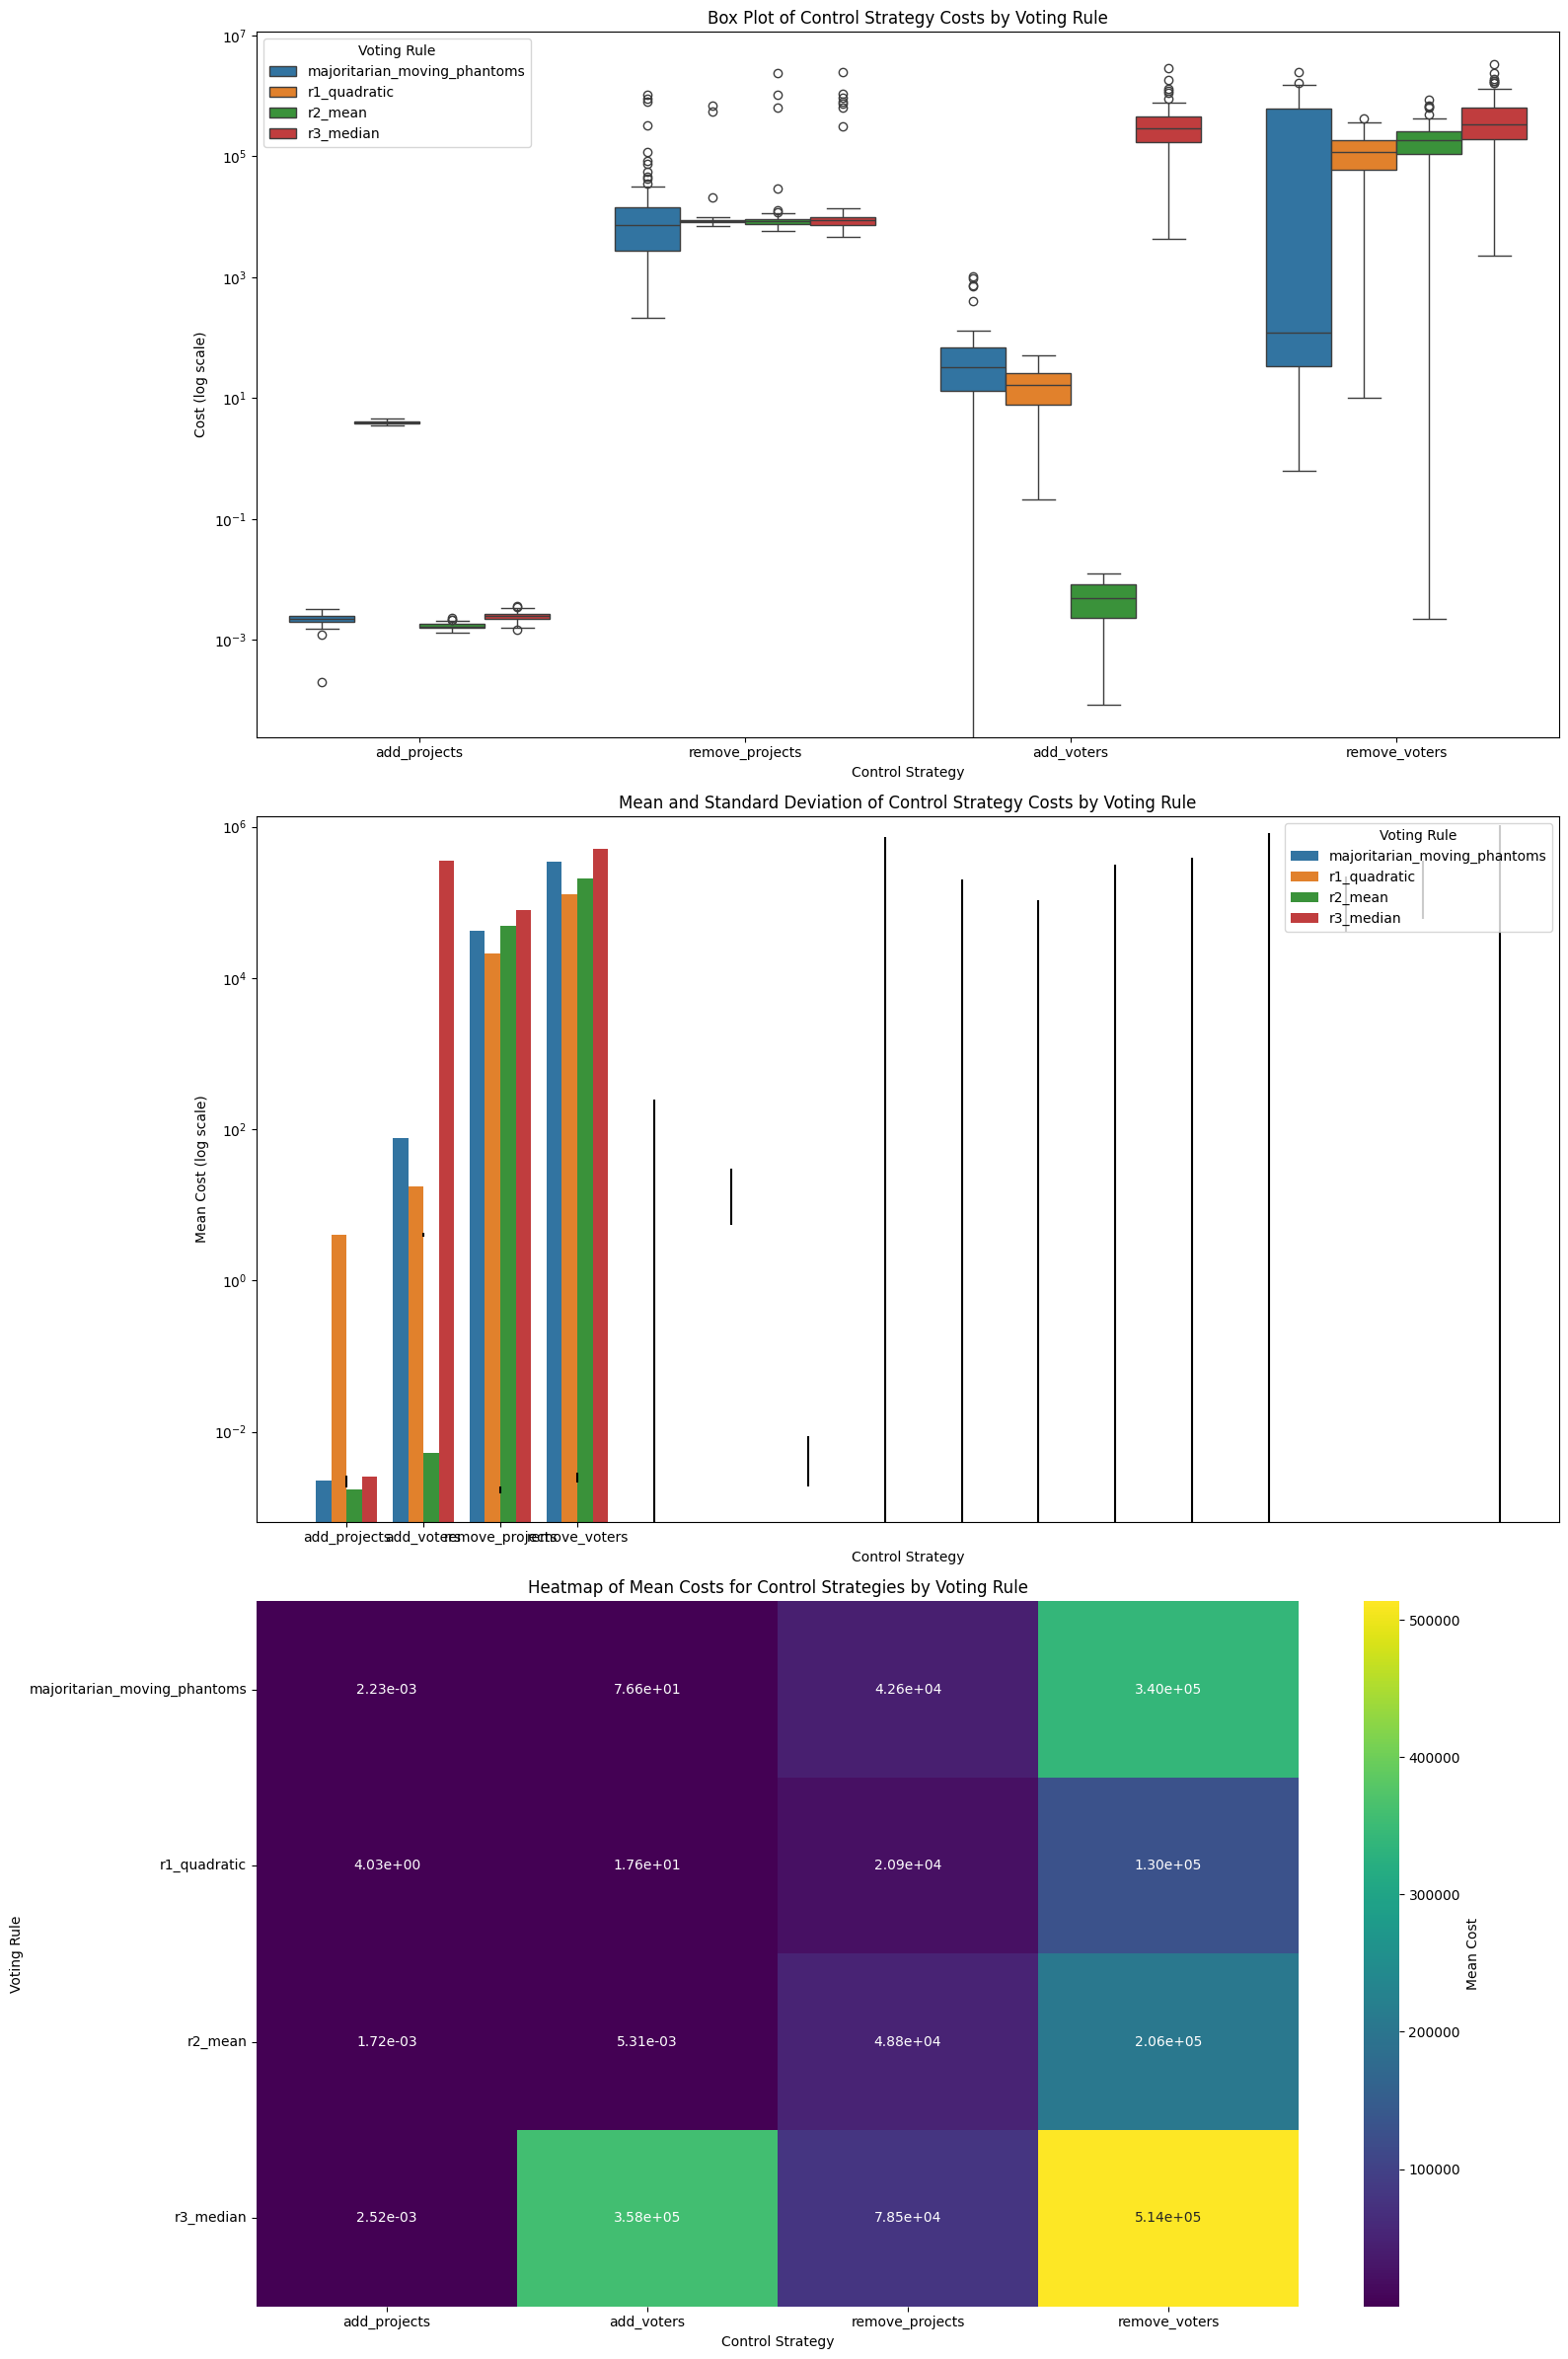

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Preparing data for enhanced visualization
control_results_long = control_results.melt(id_vars=['voting_rule'], var_name='control_strategy', value_name='cost')

# Creating a figure with multiple subplots
fig, axes = plt.subplots(3, 1, figsize=(16, 24))

# Box Plot
sns.boxplot(x='control_strategy', y='cost', hue='voting_rule', data=control_results_long, ax=axes[0])
axes[0].set_yscale('log')
axes[0].set_title('Box Plot of Control Strategy Costs by Voting Rule')
axes[0].set_xlabel('Control Strategy')
axes[0].set_ylabel('Cost (log scale)')
axes[0].legend(title='Voting Rule')

# Bar Plot for Mean and Standard Deviation
mean_std_data = control_results_long.groupby(['control_strategy', 'voting_rule']).agg(['mean', 'std']).reset_index()

# Flatten the MultiIndex
mean_std_data.columns = ['_'.join(col).strip() for col in mean_std_data.columns.values]
mean_std_data = mean_std_data.rename(columns={
    'control_strategy_': 'control_strategy', 
    'voting_rule_': 'voting_rule', 
    'cost_mean': 'mean_cost', 
    'cost_std': 'std_cost'
})

sns.barplot(x='control_strategy', y='mean_cost', hue='voting_rule', data=mean_std_data, ax=axes[1], ci=None)
axes[1].set_yscale('log')
for i, row in mean_std_data.iterrows():
    axes[1].errorbar(i, row['mean_cost'], yerr=row['std_cost'], fmt='none', c='black')
axes[1].set_title('Mean and Standard Deviation of Control Strategy Costs by Voting Rule')
axes[1].set_xlabel('Control Strategy')
axes[1].set_ylabel('Mean Cost (log scale)')
axes[1].legend(title='Voting Rule')

# Heatmap for Mean Costs
pivot_table = mean_std_data.pivot_table(index='voting_rule', columns='control_strategy', values='mean_cost')
sns.heatmap(pivot_table, annot=True, fmt=".2e", cmap='viridis', ax=axes[2], cbar_kws={'label': 'Mean Cost'})
axes[2].set_title('Heatmap of Mean Costs for Control Strategies by Voting Rule')
axes[2].set_xlabel('Control Strategy')
axes[2].set_ylabel('Voting Rule')

plt.tight_layout()
plt.show()


# Evaluate Robustness

In [ ]:
robustness_results = eval_metrics.evaluate_robustness(num_rounds)
print("Robustness Results:")
robustness_results.head(100)

Robustness Results:


,majoritarian_moving_phantoms_distances,r1_quadratic_distances,r2_mean_distances,r3_median_distances,changed_vote_l1_distances,round
0,5.459328e+05,165366.389477,2.730969e+05,7.054548e+05,1498276.0,1
1,6.649892e+05,213276.621166,5.498209e+05,6.529375e+05,3139088.0,2
2,2.547463e+04,128646.663954,2.461123e+05,6.965349e+05,1381760.0,3
3,0.000000e+00,46368.898482,9.830838e+04,0.000000e+00,541682.0,4
4,3.939608e+06,552415.062842,7.260303e+05,1.781074e+05,4047108.0,5
...,...,...,...,...,...,...
95,2.847632e+04,333118.333619,5.508869e+05,3.399372e+05,3125909.0,96
96,2.330806e+06,437010.235993,6.316618e+05,1.784875e+06,3593962.0,97
97,2.404067e+05,342122.552105,6.177449e+05,4.178641e+05,3410595.0,98
98,1.930336e+06,394619.861388,1.027412e+06,1.043678e+06,5747919.0,99


In [ ]:
print(f"Avg Mean L1 Distance: {np.mean(robustness_results['r1_quadratic_distances'])}")
print(f"Avg Median L1 Distance: {np.mean(robustness_results['r2_mean_distances'])}")
print(f"Avg Quadratic L1 Distance: {np.mean(robustness_results['r3_median_distances'])}")
print(f"Avg Majortarian L1 Distance: {np.mean(robustness_results['majoritarian_moving_phantoms_distances'])}")

Avg Mean L1 Distance: 26.009401065510527
Avg Median L1 Distance: 56.065121227059365
Avg Quadratic L1 Distance: 66.29185112216996
Avg Majortarian L1 Distance: 74.69185248589949


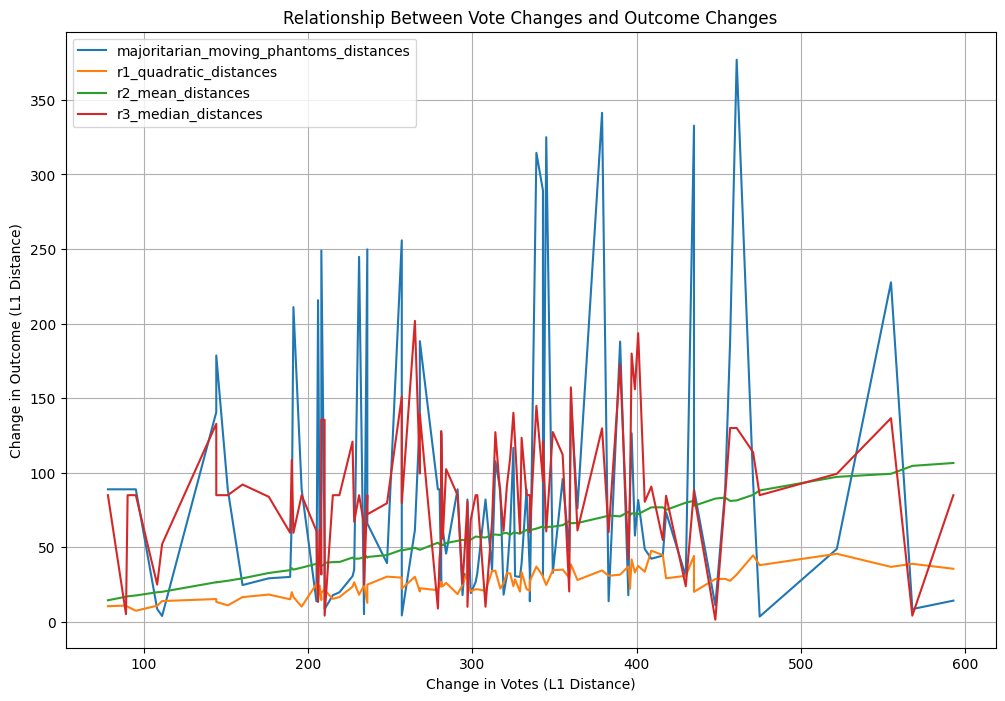

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def replace_zero_with_column_mean(df, columns):
    """Replace 0 values in specified columns with the column's mean (ignoring 0s)."""
    for column in columns:
        # Calculate the mean of the column, ignoring 0s
        non_zero_mean = df[column].replace(0, pd.NA).mean()
        
        # Replace 0 values with the calculated mean
        df[column] = df[column].replace(0, non_zero_mean)
    return df

def plot_robustness_ordered(robustness_df):
    """Plot the relationship between vote changes and outcome changes after ordering by vote change."""
    # Replace 0 values with the column mean in the specified columns
    columns_to_replace = [
        'majoritarian_moving_phantoms_distances', 
        'r1_quadratic_distances', 
        'r2_mean_distances', 
        'r3_median_distances'
    ]
    robustness_df = replace_zero_with_column_mean(robustness_df, columns_to_replace)

    # Sort by changed_vote_l1_distances
    robustness_df = robustness_df.sort_values(by='changed_vote_l1_distances').reset_index(drop=True)

    # Plot each voting rule's outcome change against the changed vote L1 distance
    plt.figure(figsize=(12, 8))
    
    for method in columns_to_replace:
        plt.plot(robustness_df['changed_vote_l1_distances'], robustness_df[method], label=method)

    plt.xlabel('Change in Votes (L1 Distance)')
    plt.ylabel('Change in Outcome (L1 Distance)')
    plt.title('Relationship Between Vote Changes and Outcome Changes')
    plt.legend()
    plt.grid(True)
    plt.show()

# Assuming robustness_df is your DataFrame with the results
plot_robustness_ordered(robustness_results)


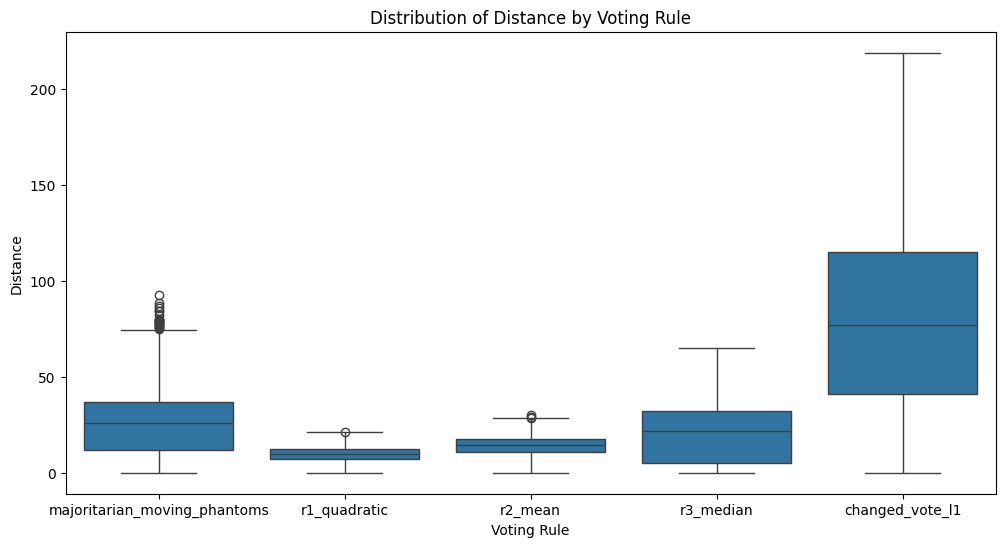

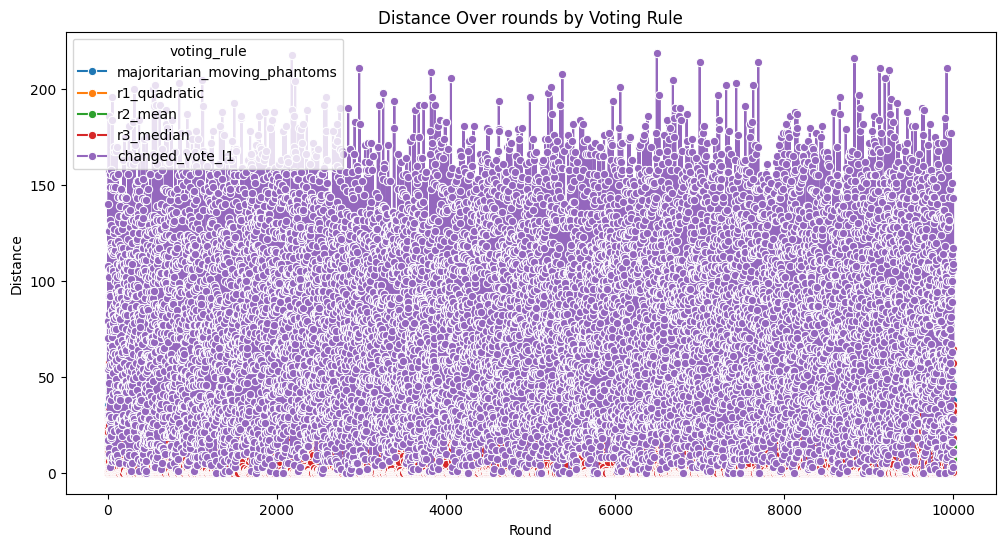

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for plotting
robustness_results_long = robustness_results.melt(id_vars=['round'], var_name='voting_rule', value_name='distance')
robustness_results_long['voting_rule'] = robustness_results_long['voting_rule'].str.replace('_distances', '')

# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='voting_rule', y='distance', data=robustness_results_long)
plt.title('Distribution of Distance by Voting Rule')
plt.xlabel('Voting Rule')
plt.ylabel('Distance')
plt.show()

# Line Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='round', y='distance', hue='voting_rule', data=robustness_results_long, marker='o')
plt.title('Distance Over rounds by Voting Rule')
plt.xlabel('Round')
plt.ylabel('Distance')
plt.show()


# Evaluate Group Strategyproofness

In [ ]:

group_strategyproofness_results = eval_metrics.evaluate_group_strategyproofness()
print("Group Strategyproofness Results:")
print(group_strategyproofness_results)

Group Strategyproofness Results:
                    voting_rule  group_strategyproof
0  majoritarian_moving_phantoms                False
1                  r1_quadratic                False
2                       r2_mean                False
3                     r3_median                False


# Evaluate Bribery Cost

In [ ]:
#bribery_results = eval_metrics.evaluate_bribery(num_rounds)
bribery_results = eval_metrics.evaluate_bribery_1(num_rounds)
print("Bribery Cost Results:")
bribery_results.head(100)

Bribery Cost Results:


,round,desired_increase,majoritarian_moving_phantoms_bribery_cost,r1_quadratic_bribery_cost,r2_mean_bribery_cost,r3_median_bribery_cost
0,1,0.005,0,9.792421e+10,1.742684e+04,1624.281386
1,2,0.010,0,1.385730e+09,9.624606e+04,4380.502433
2,3,0.015,0,6.523419e+08,9.246213e+04,7014.265295
3,4,0.020,0,1.572493e+10,1.766646e+05,8190.267881
4,5,0.025,0,1.128557e+09,1.279592e+05,14937.315795
...,...,...,...,...,...,...
95,96,0.480,0,4.259043e+09,3.087594e+06,174425.829779
96,97,0.485,0,3.651879e+09,4.718377e+06,258982.463759
97,98,0.490,0,9.928032e+10,3.777407e+06,259379.902688
98,99,0.495,0,6.545483e+10,3.555781e+06,341438.553298


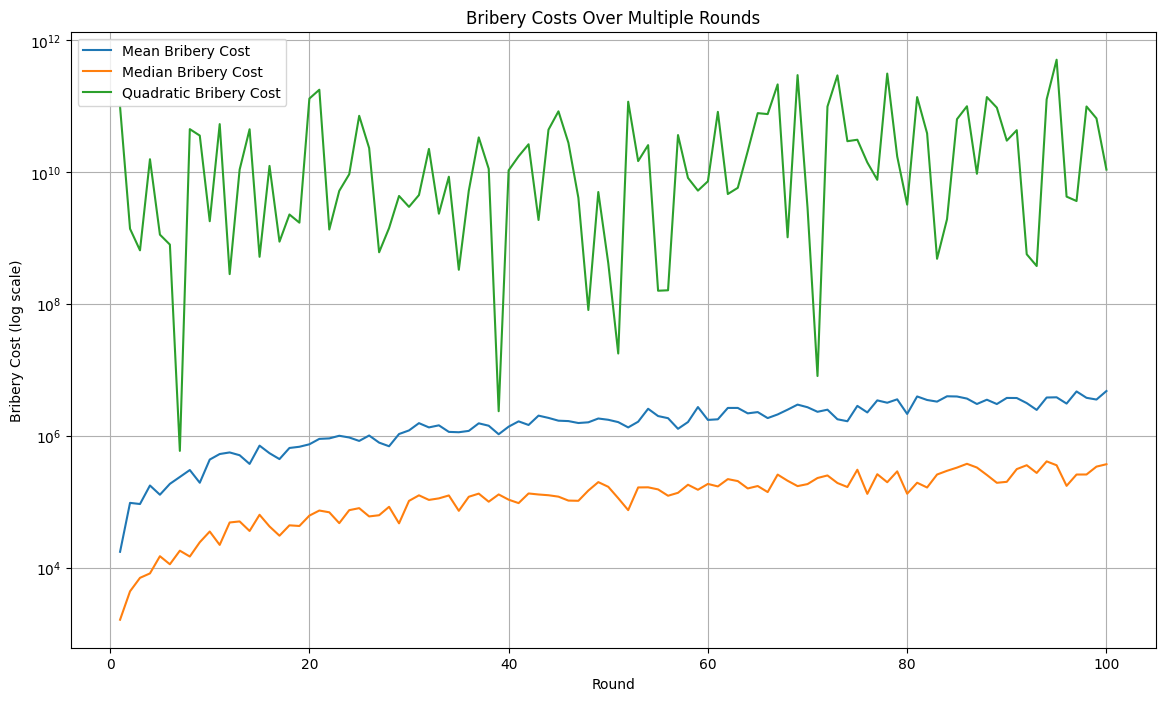

In [ ]:
import matplotlib.pyplot as plt

# Plot the results with a logarithmic y-axis
def plot_bribery_costs(df):
    plt.figure(figsize=(14, 8))

    # Plot mean bribery cost
    plt.plot(df['round'], df['r2_mean_bribery_cost'], label='Mean Bribery Cost')

    # Plot median bribery cost
    plt.plot(df['round'], df['r3_median_bribery_cost'], label='Median Bribery Cost')

    # Plot quadratic bribery cost
    plt.plot(df['round'], df['r1_quadratic_bribery_cost'], label='Quadratic Bribery Cost')

    plt.xlabel('Round')
    plt.ylabel('Bribery Cost (log scale)')
    plt.yscale('log')
    plt.title('Bribery Costs Over Multiple Rounds')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the bribery costs
plot_bribery_costs(bribery_results)

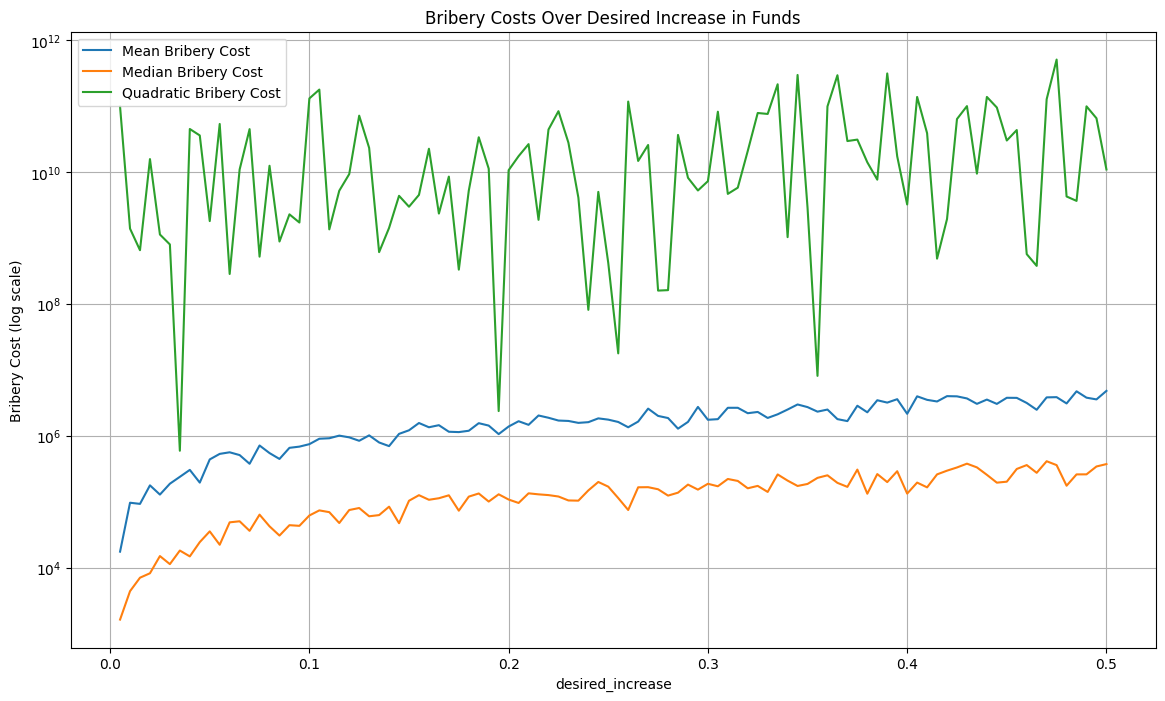

In [ ]:
def plot_bribery_costs(df):
    plt.figure(figsize=(14, 8))

    # Plot mean bribery cost
    plt.plot(df['desired_increase'], df['r2_mean_bribery_cost'], label='Mean Bribery Cost')

    # Plot median bribery cost
    plt.plot(df['desired_increase'], df['r3_median_bribery_cost'], label='Median Bribery Cost')

    # Plot quadratic bribery cost
    plt.plot(df['desired_increase'], df['r1_quadratic_bribery_cost'], label='Quadratic Bribery Cost')

    plt.xlabel('desired_increase')
    plt.ylabel('Bribery Cost (log scale)')
    plt.yscale('log')
    plt.title('Bribery Costs Over Desired Increase in Funds')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the bribery costs
plot_bribery_costs(bribery_results)

In [ ]:
summary_stats = bribery_results[['r1_quadratic_bribery_cost', 'r2_mean_bribery_cost', 'r3_median_bribery_cost']].describe()
print(summary_stats)

       r1_quadratic_bribery_cost  r2_mean_bribery_cost  r3_median_bribery_cost
count               1.000000e+02          1.000000e+02              100.000000
mean                4.355673e+10          1.879971e+06           149697.821351
std                 7.896367e+10          1.193569e+06            99626.938413
min                 5.915012e+05          1.742684e+04             1624.281386
25%                 1.864007e+09          9.373602e+05            71992.920384
50%                 1.079780e+10          1.670760e+06           132679.337849
75%                 4.482480e+10          2.721158e+06           199297.836208
max                 5.084426e+11          4.786908e+06           410126.973751
